In [1]:
import numpy as np
import pandas as pd

In [2]:
pd.set_option('precision', 5)
pd.set_option('display.float_format', lambda x: '%0.5f' % x)

In [4]:
import os
print(os.listdir("data/"))

['periods_test.csv.zip', 'periods_train.csv.zip', 'sample_submission.csv', 'train_active.csv.zip', 'test.csv.zip', 'train.csv.zip', 'test_active.csv.zip']


In [6]:
df_train = pd.read_csv('data/train.csv.zip', compression='zip', header=0, sep=',', quotechar='"')

In [7]:
df_train.head()

,item_id,user_id,region,city,parent_category_name,category_name,param_1,param_2,param_3,title,description,price,item_seq_number,activation_date,user_type,image,image_top_1,deal_probability
0,b912c3c6a6ad,e00f8ff2eaf9,Свердловская область,Екатеринбург,Личные вещи,Товары для детей и игрушки,Постельные принадлежности,NaN,NaN,Кокоби(кокон для сна),"Кокон для сна малыша,пользовались меньше месяц...",400.00000,2,2017-03-28,Private,d10c7e016e03247a3bf2d13348fe959fe6f436c1caf64c...,1008.00000,0.12789
1,2dac0150717d,39aeb48f0017,Самарская область,Самара,Для дома и дачи,Мебель и интерьер,Другое,NaN,NaN,Стойка для Одежды,"Стойка для одежды, под вешалки. С бутика.",3000.00000,19,2017-03-26,Private,79c9392cc51a9c81c6eb91eceb8e552171db39d7142700...,692.00000,0.00000
2,ba83aefab5dc,91e2f88dd6e3,Ростовская область,Ростов-на-Дону,Бытовая электроника,Аудио и видео,"Видео, DVD и Blu-ray плееры",NaN,NaN,Philips bluray,"В хорошем состоянии, домашний кинотеатр с blu ...",4000.00000,9,2017-03-20,Private,b7f250ee3f39e1fedd77c141f273703f4a9be59db4b48a...,3032.00000,0.43177
3,02996f1dd2ea,bf5cccea572d,Татарстан,Набережные Челны,Личные вещи,Товары для детей и игрушки,Автомобильные кресла,NaN,NaN,Автокресло,Продам кресло от0-25кг,2200.00000,286,2017-03-25,Company,e6ef97e0725637ea84e3d203e82dadb43ed3cc0a1c8413...,796.00000,0.80323
4,7c90be56d2ab,ef50846afc0b,Волгоградская область,Волгоград,Транспорт,Автомобили,С пробегом,ВАЗ (LADA),2110,"ВАЗ 2110, 2003",Все вопросы по телефону.,40000.00000,3,2017-03-16,Private,54a687a3a0fc1d68aed99bdaaf551c5c70b761b16fd0a2...,2264.00000,0.20797


In [8]:
df_test = pd.read_csv('data/test.csv.zip', compression='zip', header=0, sep=',', quotechar='"')

In [9]:
df_test.head()

,item_id,user_id,region,city,parent_category_name,category_name,param_1,param_2,param_3,title,description,price,item_seq_number,activation_date,user_type,image,image_top_1
0,6544e41a8817,dbe73ad6e4b5,Волгоградская область,Волгоград,Личные вещи,Детская одежда и обувь,Для мальчиков,Обувь,25,Отдам бесплатно,На ангарском,nan,66,2017-04-18,Private,a8b57acb5ab304f9c331ac7a074219aed4d349d8aef386...,2020.00000
1,65b9484d670f,2e11806abe57,Свердловская область,Нижняя Тура,Хобби и отдых,Велосипеды,Дорожные,NaN,NaN,Продам велосипед,"Продам велосипед KAMA F200,в нормальном состо...",3000.00000,4,2017-04-16,Private,NaN,nan
2,8bab230b2ecd,0b850bbebb10,Новосибирская область,Бердск,Бытовая электроника,Аудио и видео,Телевизоры и проекторы,NaN,NaN,BBK,Продам новый телевизор BBK 32 диагональ смарт...,15000.00000,15,2017-04-17,Private,8c361112cb049745ef2d1b0ae73594fc5c107286b0c942...,2960.00000
3,8e348601fefc,5f1d5c3ce0da,Саратовская область,Саратов,Для дома и дачи,Бытовая техника,Для кухни,Вытяжки,NaN,Вытяжка Jetair 60,"Продам новую вытяжку в упаковке,с документами....",4500.00000,70,2017-04-17,Private,NaN,nan
4,8bd2fe400b89,23e2d97bfc7f,Оренбургская область,Бузулук,Личные вещи,Товары для детей и игрушки,Детские коляски,NaN,NaN,Коляска зима-лето,Продам отличную коляску. б/у 1 год. все вопрос...,4900.00000,15,2017-04-15,Private,bc3cf6deef10840fc302e38eb48fa7748aa1e28d534f8f...,1002.00000


In [24]:
df_train["has_image"] = pd.notna(df_train['image'])

In [25]:
df_test["has_image"] = pd.notna(df_test['image'])

In [26]:
df_train['has_image'].value_counts()

True     1390836
False     112588
Name: has_image, dtype: int64

In [27]:
df_test['has_image'].value_counts()

True     465829
False     42609
Name: has_image, dtype: int64

In [28]:
data = pd.concat([df_train, df_test], axis=0)

In [29]:
data.shape

(2011862, 19)

In [31]:
from sklearn.preprocessing import LabelEncoder
import lightgbm as lgb

In [32]:
data.head()

,activation_date,category_name,city,deal_probability,description,has_image,image,image_top_1,item_id,item_seq_number,param_1,param_2,param_3,parent_category_name,price,region,title,user_id,user_type
0,2017-03-28,Товары для детей и игрушки,Екатеринбург,0.12789,"Кокон для сна малыша,пользовались меньше месяц...",True,d10c7e016e03247a3bf2d13348fe959fe6f436c1caf64c...,1008.00000,b912c3c6a6ad,2,Постельные принадлежности,NaN,NaN,Личные вещи,400.00000,Свердловская область,Кокоби(кокон для сна),e00f8ff2eaf9,Private
1,2017-03-26,Мебель и интерьер,Самара,0.00000,"Стойка для одежды, под вешалки. С бутика.",True,79c9392cc51a9c81c6eb91eceb8e552171db39d7142700...,692.00000,2dac0150717d,19,Другое,NaN,NaN,Для дома и дачи,3000.00000,Самарская область,Стойка для Одежды,39aeb48f0017,Private
2,2017-03-20,Аудио и видео,Ростов-на-Дону,0.43177,"В хорошем состоянии, домашний кинотеатр с blu ...",True,b7f250ee3f39e1fedd77c141f273703f4a9be59db4b48a...,3032.00000,ba83aefab5dc,9,"Видео, DVD и Blu-ray плееры",NaN,NaN,Бытовая электроника,4000.00000,Ростовская область,Philips bluray,91e2f88dd6e3,Private
3,2017-03-25,Товары для детей и игрушки,Набережные Челны,0.80323,Продам кресло от0-25кг,True,e6ef97e0725637ea84e3d203e82dadb43ed3cc0a1c8413...,796.00000,02996f1dd2ea,286,Автомобильные кресла,NaN,NaN,Личные вещи,2200.00000,Татарстан,Автокресло,bf5cccea572d,Company
4,2017-03-16,Автомобили,Волгоград,0.20797,Все вопросы по телефону.,True,54a687a3a0fc1d68aed99bdaaf551c5c70b761b16fd0a2...,2264.00000,7c90be56d2ab,3,С пробегом,ВАЗ (LADA),2110,Транспорт,40000.00000,Волгоградская область,"ВАЗ 2110, 2003",ef50846afc0b,Private


In [34]:
data.activation_date = pd.to_datetime(data.activation_date)

df_train.activation_date = pd.to_datetime(df_train.activation_date)

data['day_of_month'] = data.activation_date.apply(lambda x: x.day)
data['day_of_week'] = data.activation_date.apply(lambda x: x.weekday())

df_train['day_of_month'] = df_train.activation_date.apply(lambda x: x.day)
df_train['day_of_week'] = df_train.activation_date.apply(lambda x: x.weekday())

In [35]:
data['char_len_title'] = data.title.apply(lambda x: len(str(x)))
data['char_len_desc'] = data.description.apply(lambda x: len(str(x)))

In [36]:
aggregate_columns = ['region', 'city', 'parent_category_name', 'category_name',
            'image_top_1', 'user_type','item_seq_number','day_of_month','day_of_week']

In [40]:
gp = df_train.groupby('region')['deal_probability']

In [41]:
gp.mean()

region
Алтайский край            0.13626
Башкортостан              0.14886
Белгородская область      0.14560
Владимирская область      0.14099
Волгоградская область     0.14591
Воронежская область       0.14101
Иркутская область         0.13968
Калининградская область   0.13157
Кемеровская область       0.13548
Краснодарский край        0.14707
Красноярский край         0.12036
Нижегородская область     0.14661
Новосибирская область     0.12469
Омская область            0.12919
Оренбургская область      0.15592
Пермский край             0.14369
Ростовская область        0.13594
Самарская область         0.13672
Саратовская область       0.14599
Свердловская область      0.12200
Ставропольский край       0.15359
Татарстан                 0.14260
Тульская область          0.14388
Тюменская область         0.12419
Удмуртия                  0.14813
Ханты-Мансийский АО       0.14370
Челябинская область       0.14323
Ярославская область       0.12884
Name: deal_probability, dtype: float64

In [42]:
gp.std()

region
Алтайский край            0.25698
Башкортостан              0.26091
Белгородская область      0.26310
Владимирская область      0.26410
Волгоградская область     0.26768
Воронежская область       0.26543
Иркутская область         0.25521
Калининградская область   0.26275
Кемеровская область       0.25708
Краснодарский край        0.25848
Красноярский край         0.24318
Нижегородская область     0.27110
Новосибирская область     0.25516
Омская область            0.26175
Оренбургская область      0.26772
Пермский край             0.26604
Ростовская область        0.25479
Самарская область         0.25902
Саратовская область       0.26404
Свердловская область      0.25256
Ставропольский край       0.25973
Татарстан                 0.25994
Тульская область          0.26651
Тюменская область         0.24361
Удмуртия                  0.26473
Ханты-Мансийский АО       0.26093
Челябинская область       0.26613
Ярославская область       0.26017
Name: deal_probability, dtype: float64

In [43]:
for c in aggregate_columns:
    gp1 = df_train.groupby(c)['deal_probability']
    gp2 = df_train.groupby(c)['price']
    
    mean1 = gp1.mean()
    mean2 = gp2.mean()
    std1 = gp1.std()
    std2 = gp2.std()
    
    data[c + '_deal_probability_avg'] = data[c].map(mean1)
    data[c + '_deal_probability_std'] = data[c].map(std1)
    data[c + '_price_avg'] = data[c].map(mean2)
    data[c + '_price_std'] = data[c].map(std2)

In [44]:
data.shape

(2011862, 59)

In [45]:
data.columns

Index(['activation_date', 'category_name', 'city', 'deal_probability',
       'description', 'has_image', 'image', 'image_top_1', 'item_id',
       'item_seq_number', 'param_1', 'param_2', 'param_3',
       'parent_category_name', 'price', 'region', 'title', 'user_id',
       'user_type', 'day_of_month', 'day_of_week', 'char_len_title',
       'char_len_desc', 'region_deal_probability_avg',
       'region_deal_probability_std', 'region_price_avg', 'region_price_std',
       'city_deal_probability_avg', 'city_deal_probability_std',
       'city_price_avg', 'city_price_std',
       'parent_category_name_deal_probability_avg',
       'parent_category_name_deal_probability_std',
       'parent_category_name_price_avg', 'parent_category_name_price_std',
       'category_name_deal_probability_avg',
       'category_name_deal_probability_std', 'category_name_price_avg',
       'category_name_price_std', 'image_top_1_deal_probability_avg',
       'image_top_1_deal_probability_std', 'image_top_

In [47]:
data['parent_category_name'].value_counts()

Личные вещи            914200
Для дома и дачи        243733
Бытовая электроника    231290
Недвижимость           210577
Хобби и отдых          117282
Транспорт              109792
Услуги                  88004
Животные                72446
Для бизнеса             24538
Name: parent_category_name, dtype: int64

In [46]:
# cat_col = ['city',  'category_name', 'user_type', 'region', 'has_image', 'parent_category_name']

In [48]:
# for c in cat_col:
#     data[c] = LabelEncoder().fit_transform(data[c].values)


In [49]:
# data.to_csv("data/data.csv")

In [76]:
new_data = data.drop(['user_id','description','image',
                      'item_id','param_1','param_2','param_3','title', 'city',  
                      'category_name', 'user_type', 'region', 'has_image', 'parent_category_name' ], axis=1)

In [77]:
from sklearn.model_selection import train_test_split
import gc

In [87]:
X = new_data.loc[new_data.activation_date<=pd.to_datetime('2017-04-07')]
X_te = new_data.loc[new_data.activation_date>=pd.to_datetime('2017-04-08')]

y = X['deal_probability']
X = X.drop(['deal_probability','activation_date'],axis=1)
X_tr, X_va, y_tr, y_va = train_test_split(X, y, test_size=0.2, random_state=2018)
X_te = X_te.drop(['deal_probability','activation_date'],axis=1)

print(X_tr.shape, X_va.shape, X_te.shape)


# del X
# del y
# gc.collect()

(1202739, 43) (300685, 43) (508438, 43)


In [79]:
df_train.shape

(1503424, 21)

In [80]:
df_test.shape

(508438, 18)

In [81]:
# tr_data = lgb.Dataset(X_tr, label=y_tr, categorical_feature=cat_col)
# va_data = lgb.Dataset(X_va, label=y_va, categorical_feature=cat_col, reference=tr_data)

tr_data = lgb.Dataset(X_tr, label=y_tr)
va_data = lgb.Dataset(X_va, label=y_va, reference=tr_data)

In [82]:
del X_tr
del X_va
del y_tr
del y_va
gc.collect()

0

In [83]:
parameters = {
    'task': 'train',
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': 'rmse',
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': 50
}


#     params = {
#         "objective" : "regression",
#         "metric" : "rmse",
#         "num_leaves" : 30,
#         "learning_rate" : 0.1,
#         "bagging_fraction" : 0.7,
#         "feature_fraction" : 0.7,
#         "bagging_frequency" : 5,
#         "bagging_seed" : 2018,
#         "verbosity" : -1
#     }


model = lgb.train(parameters,
                  tr_data,
                  valid_sets=va_data,
                  num_boost_round=2000,
                  early_stopping_rounds=120,
                  verbose_eval=50)

Training until validation scores don't improve for 120 rounds.
[50]	valid_0's rmse: 0.230325
[100]	valid_0's rmse: 0.228325
[150]	valid_0's rmse: 0.227518
[200]	valid_0's rmse: 0.227056
[250]	valid_0's rmse: 0.226749
[300]	valid_0's rmse: 0.226496
[350]	valid_0's rmse: 0.226321
[400]	valid_0's rmse: 0.226153
[450]	valid_0's rmse: 0.226033
[500]	valid_0's rmse: 0.2259
[550]	valid_0's rmse: 0.225779
[600]	valid_0's rmse: 0.225677
[650]	valid_0's rmse: 0.225582
[700]	valid_0's rmse: 0.225498
[750]	valid_0's rmse: 0.225425
[800]	valid_0's rmse: 0.225356
[850]	valid_0's rmse: 0.225277
[900]	valid_0's rmse: 0.225237
[950]	valid_0's rmse: 0.225163
[1000]	valid_0's rmse: 0.225123
[1050]	valid_0's rmse: 0.225071
[1100]	valid_0's rmse: 0.22504
[1150]	valid_0's rmse: 0.224994
[1200]	valid_0's rmse: 0.224968
[1250]	valid_0's rmse: 0.224935
[1300]	valid_0's rmse: 0.224897
[1350]	valid_0's rmse: 0.224861
[1400]	valid_0's rmse: 0.224839
[1450]	valid_0's rmse: 0.224803
[1500]	valid_0's rmse: 0.224773


In [84]:
y_pred = model.predict(X_te)
sub = pd.read_csv('data/sample_submission.csv')
sub['deal_probability'] = y_pred
sub['deal_probability'].clip(0.0, 1.0, inplace=True)
sub.to_csv('pred/lgb_mean_encode2.csv', index=False)
sub.head()

,item_id,deal_probability
0,6544e41a8817,0.04209
1,65b9484d670f,0.11960
2,8bab230b2ecd,0.09649
3,8e348601fefc,0.21156
4,8bd2fe400b89,0.29941


In [85]:
import xgboost as xgb

/home/shrishty/.conda/envs/tf/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [88]:
# X_tr, X_va, y_tr, y_va = train_test_split(X, y, test_size=0.2, random_state=2018)
# X_te = X_te.drop(['deal_probability','activation_date'],axis=1)

dtrain = xgb.DMatrix(X_tr, y_tr)
dval = xgb.DMatrix(X_va, y_va)

In [89]:
params={
        'eta':0.1,
        'seed':0,
        'subsample':0.8,
        'colsample_bytree':0.8,
        'objective':'reg:linear',
        'max_depth':7,
        'min_child_weight':1,
        'eval_metric': 'rmse'
        }

watchlist = [(dtrain, 'train'), (dval, 'valid')]
reg=xgb.train(params, 
              dtrain, 
              num_boost_round=3500,
              evals=watchlist,
              early_stopping_rounds=50,
              verbose_eval=50)

[0]	train-rmse:0.413153	valid-rmse:0.413251
Multiple eval metrics have been passed: 'valid-rmse' will be used for early stopping.

Will train until valid-rmse hasn't improved in 50 rounds.
[50]	train-rmse:0.226739	valid-rmse:0.227636
[100]	train-rmse:0.224617	valid-rmse:0.226362
[150]	train-rmse:0.223102	valid-rmse:0.225708
[200]	train-rmse:0.22201	valid-rmse:0.225385
[250]	train-rmse:0.220967	valid-rmse:0.225148
[300]	train-rmse:0.219922	valid-rmse:0.224949
[350]	train-rmse:0.219012	valid-rmse:0.224811
[400]	train-rmse:0.218179	valid-rmse:0.224737
[450]	train-rmse:0.217353	valid-rmse:0.224681
[500]	train-rmse:0.216513	valid-rmse:0.224621
[550]	train-rmse:0.215708	valid-rmse:0.224582
[600]	train-rmse:0.214908	valid-rmse:0.224537
[650]	train-rmse:0.214162	valid-rmse:0.224508
[700]	train-rmse:0.21339	valid-rmse:0.224487
[750]	train-rmse:0.212626	valid-rmse:0.224479
[800]	train-rmse:0.21185	valid-rmse:0.224483
Stopping. Best iteration:
[783]	train-rmse:0.212125	valid-rmse:0.224466



In [90]:
dtest = xgb.DMatrix(X_te)

In [91]:
# reg.predict(dtest)

y_pred = reg.predict(dtest)
sub = pd.read_csv('data/sample_submission.csv')
sub['deal_probability'] = y_pred
sub['deal_probability'].clip(0.0, 1.0, inplace=True)
sub.to_csv('pred/xgboost1.csv', index=False)
sub.head()

,item_id,deal_probability
0,6544e41a8817,0.06138
1,65b9484d670f,0.12807
2,8bab230b2ecd,0.06238
3,8e348601fefc,0.19303
4,8bd2fe400b89,0.33330


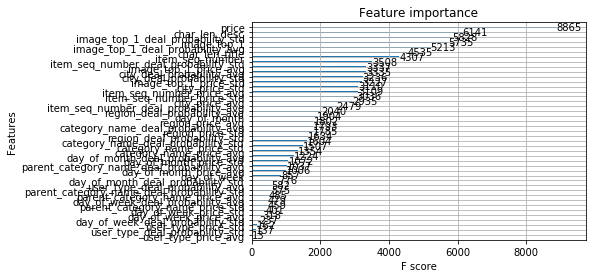

In [95]:
xgb.plot_importance(reg)

In [94]:
%matplotlib inline

In [97]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

In [98]:
xgb_reg = XGBRegressor()

In [114]:
param = {
              'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['reg:linear'],
              'learning_rate': [0.05, 0.01, 0.1, 0.5], #so called `eta` value
              'max_depth': [6, 10, 15, 20, 25],
              'min_child_weight': [11, 10, 20],
              'subsample': [0.8, 0.5],
              'colsample_bytree': [0.7, 0.8, 0.5],
              'n_estimators': [100, 200, 500, 1000], #number of trees, change it to 1000 for better results
              'seed': [1337]
             }


# params={
#         'eta':0.1,
#         'seed':0,
#         'subsample':0.8,
#         'colsample_bytree':0.8,
#         'objective':'reg:linear',
#         'max_depth':7,
#         'min_child_weight':1,
#         'eval_metric': 'rmse'
#         }

In [115]:
from sklearn.model_selection import StratifiedKFold

In [ ]:
clf = GridSearchCV(xgb_reg, param, n_jobs=5, 
#                    cv=StratifiedKFold(n_splits=10, shuffle=True), 
                   scoring='neg_mean_squared_error',
                   verbose=2, refit=True)

clf.fit(X_tr, y_tr)

Fitting 3 folds for each of 1440 candidates, totalling 4320 fits
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=6, min_child_weight=11, n_estimators=100, nthread=4, objective=reg:linear, seed=1337, subsample=0.8 
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=6, min_child_weight=11, n_estimators=100, nthread=4, objective=reg:linear, seed=1337, subsample=0.8 
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=6, min_child_weight=11, n_estimators=100, nthread=4, objective=reg:linear, seed=1337, subsample=0.8 
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=6, min_child_weight=11, n_estimators=100, nthread=4, objective=reg:linear, seed=1337, subsample=0.5 
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=6, min_child_weight=11, n_estimators=100, nthread=4, objective=reg:linear, seed=1337, subsample=0.5 
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=6, min_child_weight=11, n_estimators=100, nthread=4, objective=reg:linear, seed=1337, su

[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=6, min_child_weight=10, n_estimators=100, nthread=4, objective=reg:linear, seed=1337, subsample=0.5, total=12.8min
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=6, min_child_weight=10, n_estimators=200, nthread=4, objective=reg:linear, seed=1337, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=6, min_child_weight=10, n_estimators=100, nthread=4, objective=reg:linear, seed=1337, subsample=0.5, total=13.1min
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=6, min_child_weight=10, n_estimators=200, nthread=4, objective=reg:linear, seed=1337, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=6, min_child_weight=11, n_estimators=1000, nthread=4, objective=reg:linear, seed=1337, subsample=0.5, total=145.7min
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=6, min_child_weight=10, n_estimators=200, nthread=4, objective=reg:linear, seed=1337, subsample=0.8 
[CV] 

[Parallel(n_jobs=5)]: Done  31 tasks      | elapsed: 714.4min


[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=6, min_child_weight=10, n_estimators=500, nthread=4, objective=reg:linear, seed=1337, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=6, min_child_weight=10, n_estimators=500, nthread=4, objective=reg:linear, seed=1337, subsample=0.8, total=325.0min
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=6, min_child_weight=10, n_estimators=500, nthread=4, objective=reg:linear, seed=1337, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=6, min_child_weight=10, n_estimators=500, nthread=4, objective=reg:linear, seed=1337, subsample=0.8, total=326.7min
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=6, min_child_weight=10, n_estimators=1000, nthread=4, objective=reg:linear, seed=1337, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=6, min_child_weight=10, n_estimators=500, nthread=4, objective=reg:linear, seed=1337, subsample=0.5, total=328.9min
[CV

[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=6, min_child_weight=20, n_estimators=500, nthread=4, objective=reg:linear, seed=1337, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=6, min_child_weight=20, n_estimators=500, nthread=4, objective=reg:linear, seed=1337, subsample=0.5, total=46.9min
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=6, min_child_weight=20, n_estimators=1000, nthread=4, objective=reg:linear, seed=1337, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=6, min_child_weight=20, n_estimators=500, nthread=4, objective=reg:linear, seed=1337, subsample=0.5, total=45.8min
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=6, min_child_weight=20, n_estimators=1000, nthread=4, objective=reg:linear, seed=1337, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=6, min_child_weight=20, n_estimators=500, nthread=4, objective=reg:linear, seed=1337, subsample=0.5, total=47.0min
[CV] 

Exception in thread Thread-11:
Traceback (most recent call last):
  File "/home/shrishty/.conda/envs/tf/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/shrishty/.conda/envs/tf/lib/python3.6/threading.py", line 864, in run
    self._target(*self._args, **self._kwargs)
  File "/home/shrishty/.conda/envs/tf/lib/python3.6/multiprocessing/pool.py", line 405, in _handle_workers
    pool._maintain_pool()
  File "/home/shrishty/.conda/envs/tf/lib/python3.6/multiprocessing/pool.py", line 246, in _maintain_pool
    self._repopulate_pool()
  File "/home/shrishty/.conda/envs/tf/lib/python3.6/multiprocessing/pool.py", line 239, in _repopulate_pool
    w.start()
  File "/home/shrishty/.conda/envs/tf/lib/python3.6/multiprocessing/process.py", line 105, in start
    self._popen = self._Popen(self)
  File "/home/shrishty/.conda/envs/tf/lib/python3.6/multiprocessing/context.py", line 277, in _Popen
    return Popen(process_obj)
  File "/home/shrishty/.conda/envs/t

[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=10, min_child_weight=11, n_estimators=200, nthread=4, objective=reg:linear, seed=1337, subsample=0.8, total=31.2min
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=10, min_child_weight=11, n_estimators=200, nthread=4, objective=reg:linear, seed=1337, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=10, min_child_weight=11, n_estimators=200, nthread=4, objective=reg:linear, seed=1337, subsample=0.8, total=31.9min
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=10, min_child_weight=11, n_estimators=200, nthread=4, objective=reg:linear, seed=1337, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=10, min_child_weight=11, n_estimators=200, nthread=4, objective=reg:linear, seed=1337, subsample=0.5, total=28.2min
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=10, min_child_weight=11, n_estimators=200, nthread=4, objective=reg:linear, seed=1337, subsample=0.5 
[

[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=10, min_child_weight=10, n_estimators=200, nthread=4, objective=reg:linear, seed=1337, subsample=0.8, total=22.2min
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=10, min_child_weight=10, n_estimators=200, nthread=4, objective=reg:linear, seed=1337, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=10, min_child_weight=10, n_estimators=200, nthread=4, objective=reg:linear, seed=1337, subsample=0.5, total=22.9min
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=10, min_child_weight=10, n_estimators=200, nthread=4, objective=reg:linear, seed=1337, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=10, min_child_weight=10, n_estimators=200, nthread=4, objective=reg:linear, seed=1337, subsample=0.5, total=24.2min
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=10, min_child_weight=10, n_estimators=500, nthread=4, objective=reg:linear, seed=1337, subsample=0.8 
[

[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=10, min_child_weight=20, n_estimators=200, nthread=4, objective=reg:linear, seed=1337, subsample=0.5, total=20.6min
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=10, min_child_weight=20, n_estimators=200, nthread=4, objective=reg:linear, seed=1337, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=10, min_child_weight=20, n_estimators=200, nthread=4, objective=reg:linear, seed=1337, subsample=0.5, total=20.4min
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=10, min_child_weight=20, n_estimators=500, nthread=4, objective=reg:linear, seed=1337, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=10, min_child_weight=20, n_estimators=200, nthread=4, objective=reg:linear, seed=1337, subsample=0.5, total=20.7min
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=10, min_child_weight=20, n_estimators=500, nthread=4, objective=reg:linear, seed=1337, subsample=0.8 
[

[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=15, min_child_weight=11, n_estimators=200, nthread=4, objective=reg:linear, seed=1337, subsample=0.5, total=33.0min
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=15, min_child_weight=11, n_estimators=500, nthread=4, objective=reg:linear, seed=1337, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=15, min_child_weight=11, n_estimators=200, nthread=4, objective=reg:linear, seed=1337, subsample=0.5, total=33.7min
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=15, min_child_weight=11, n_estimators=500, nthread=4, objective=reg:linear, seed=1337, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=15, min_child_weight=11, n_estimators=500, nthread=4, objective=reg:linear, seed=1337, subsample=0.8, total=81.1min
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=15, min_child_weight=11, n_estimators=500, nthread=4, objective=reg:linear, seed=1337, subsample=0.8 
[

[Parallel(n_jobs=5)]: Done 152 tasks      | elapsed: 5988.4min


[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=15, min_child_weight=11, n_estimators=500, nthread=4, objective=reg:linear, seed=1337, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=15, min_child_weight=11, n_estimators=500, nthread=4, objective=reg:linear, seed=1337, subsample=0.5, total=84.0min
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=15, min_child_weight=11, n_estimators=1000, nthread=4, objective=reg:linear, seed=1337, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=15, min_child_weight=11, n_estimators=500, nthread=4, objective=reg:linear, seed=1337, subsample=0.5, total=85.2min
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=15, min_child_weight=11, n_estimators=1000, nthread=4, objective=reg:linear, seed=1337, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=15, min_child_weight=11, n_estimators=1000, nthread=4, objective=reg:linear, seed=1337, subsample=0.8, total=164.8m

[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=15, min_child_weight=10, n_estimators=1000, nthread=4, objective=reg:linear, seed=1337, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=15, min_child_weight=10, n_estimators=500, nthread=4, objective=reg:linear, seed=1337, subsample=0.5, total=85.3min
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=15, min_child_weight=10, n_estimators=1000, nthread=4, objective=reg:linear, seed=1337, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=15, min_child_weight=10, n_estimators=1000, nthread=4, objective=reg:linear, seed=1337, subsample=0.8, total=181.5min
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=15, min_child_weight=10, n_estimators=1000, nthread=4, objective=reg:linear, seed=1337, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=15, min_child_weight=10, n_estimators=1000, nthread=4, objective=reg:linear, seed=1337, subsample=0.8, total=181